In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) '''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename)) "

# Sales Prediction

* Problem Statement:
 * We have to build a model which predicts sales based on the money spend on different plateforms for marketing

# Import Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load The Data

In [3]:
data = pd.read_csv('advertising.csv') #/kaggle/input/advertising-dataset/advertising.csv')


# Display Top 5 Rows

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Check The Shape Of DataFrame

In [5]:
data.shape

(200, 4)

# Quick Overview Of The DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


 # Get summary statistics

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Check for Missing Values

In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Check For Duplicates

In [9]:
data.duplicated().any()

np.False_

In [10]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Outlier Analysis

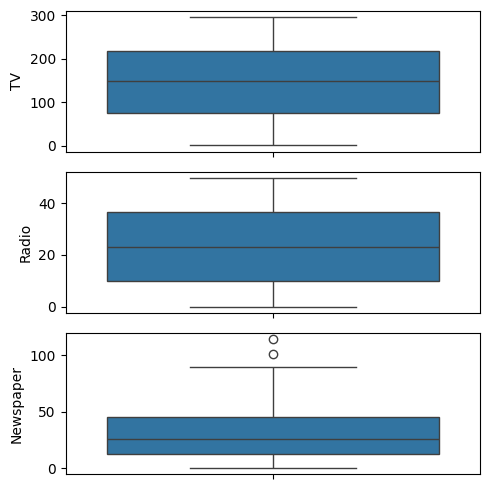

In [11]:
fig, axs = plt.subplots(3, figsize= (5,5))
plt1 = sns.boxplot(data['TV'], ax= axs[0])
plt2 = sns.boxplot(data['Radio'], ax= axs[1])
plt3 = sns.boxplot(data['Newspaper'], ax= axs[2])
plt.tight_layout()

* Two outliers (represented by dots) lie beyond the whiskers, indicating a few unusually high spending values on newspapers.

# EDA

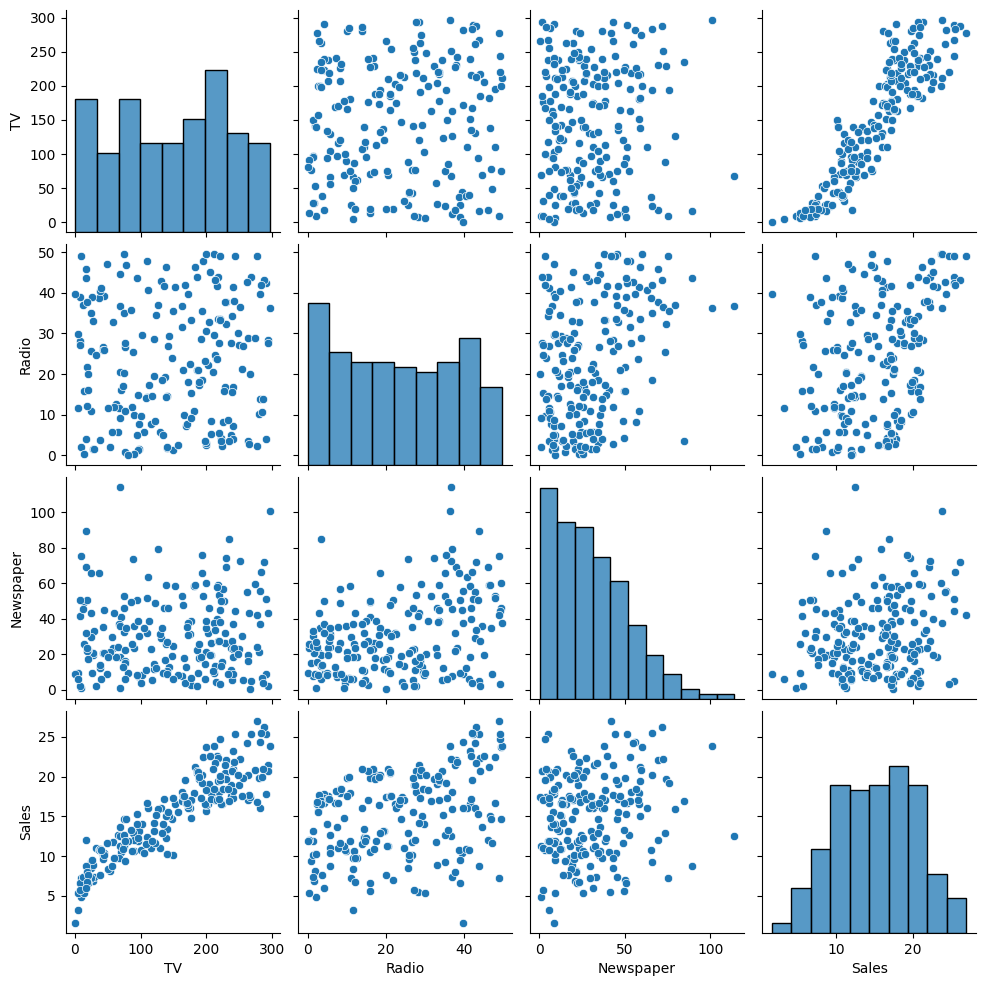

In [12]:
sns.pairplot(data)

<Axes: >

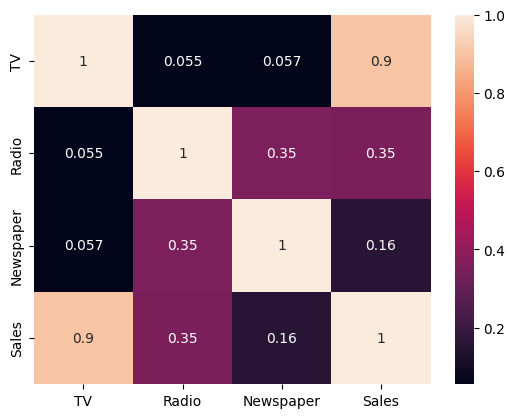

In [13]:
sns.heatmap(data.corr(), annot=True)

**As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.**

In [14]:
X = data['TV']
y = data['Sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Building a Linear Model:**
*You first need to import the statsmodel.api library using which you'll perform the linear regression.*

In [19]:
!pip install statsmodels

In [20]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin . But in order to have an intercept, you need to manuaaly use the add_constant attribute of statsmodels and once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS attribute of statsmodels as shown below

In [21]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using OLS
lr = sm.OLS(y_train, X_train_sm).fit()

In [22]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [23]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.71e-59
Time:                        21:57:32   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

**Looking at some key statistics from the summary**
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.055, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.813
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 7.0071 + 0.055 \times TV $

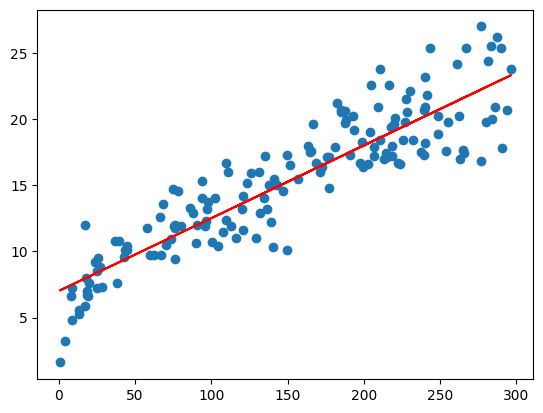

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train,7.0071+0.055*X_train,'r' )

# Model Evaluation

* Residual analysis\
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms\
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [25]:
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

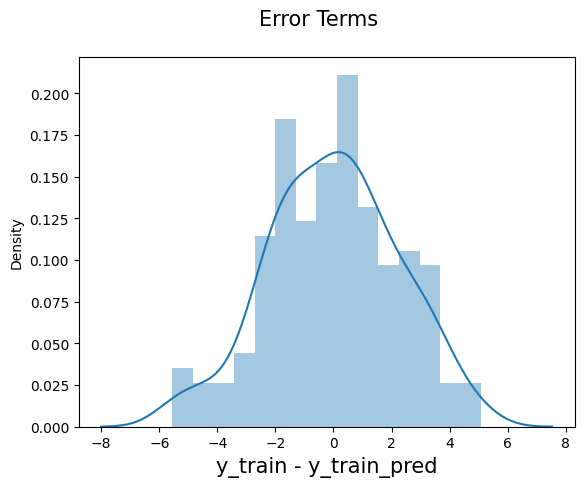

In [26]:
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize = 15) # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15) # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

Looking for patterns in the residuals

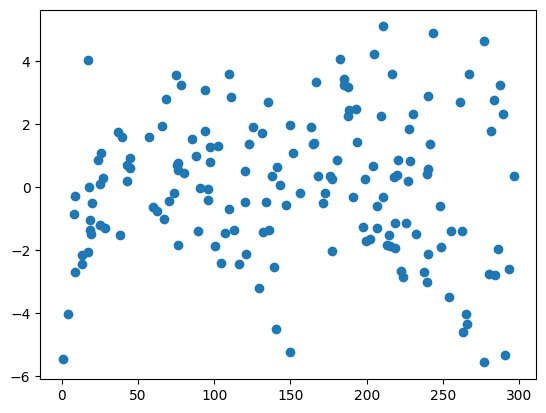

In [27]:
plt.scatter(X_train, res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

**Predictions on the Test Set**
* Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [28]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE


In [30]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.470035001123256)

Checking the R-squared on the test set


In [31]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.802561303423698

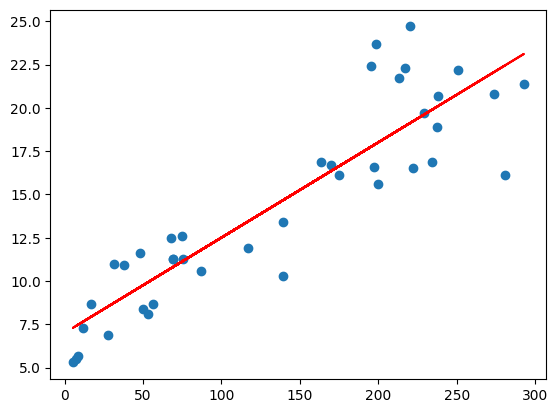

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.0071 + 0.055 * X_test, 'r')
plt.show()

=======================================================================

# This part is For my understanding 

* As we know correlation between sales and newspaper is very low so drop newspaper from dataset

In [33]:
# data.drop('Radio',axis=1,inplace=True)
data.drop('Newspaper',axis=1,inplace=True)

<Axes: >

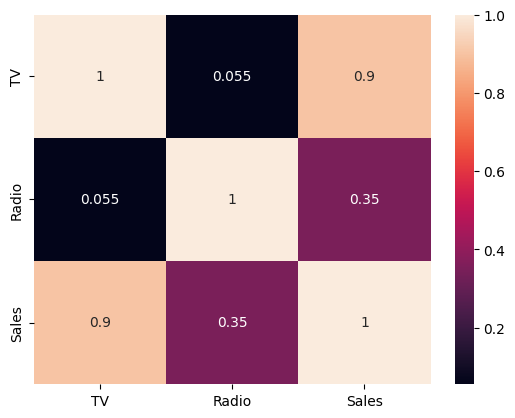

In [34]:
sns.heatmap(data.corr(), annot=True)

* **There is high correlation between TV and sales**

In [35]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

In [40]:
r2 = r2_score(y_test, y_pred)

In [41]:
# Calculating adjusted R-squared
n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

R-squared: 0.9078797802624651
Adjusted R-squared: 0.9069445496052312


* **Because the correlation between newapaper ans sales is very less so before and after droping newspaper from the dataframe the accuray is same**